In [5]:
import pandas as pd

column_names = [
    'area', 'perimeter', 'compactness',
    'kernel_length', 'kernel_width',
    'asymmetry_coeff', 'kernel_groove_len',
    'class_label'
]

df = pd.read_csv('seeds_dataset.txt', delimiter='\t', on_bad_lines='skip', header=None, names=column_names)
df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_len,class_label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [6]:
# 결측치 확인인
df.isna().sum()

area                 0
perimeter            0
compactness          0
kernel_length        0
kernel_width         0
asymmetry_coeff      0
kernel_groove_len    0
class_label          0
dtype: int64

In [7]:
X = df.drop(columns='class_label')
Y= df['class_label']
Y = pd.get_dummies(Y)
Y

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
194,False,False,True
195,False,False,True
196,False,False,True
197,False,False,True


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

print(y_train.shape)

(159, 3)


In [9]:
from keras import Sequential, Model
from keras.layers import Dense,Input
from keras.optimizers import Adam

class SimpleMLP(Model):
    def __init__(self, num_classes):
        super(SimpleMLP, self).__init__(name='mlp')
        self.num_classes = num_classes

        self.dense1 = Dense(64, activation='relu')
        self.dense1 = Dense(32, activation='relu')
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(num_classes, activation='softmax')
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

model = SimpleMLP(3)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [10]:
# 모델 학습 및 예측
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=16, validation_split= 0.2)
y_pred = model.predict(X_test)

Epoch 1/30


c:\Users\jshan\anaconda3\Lib\site-packages\keras\src\layers\layer.py:395: UserWarning: `build()` was called on layer 'mlp', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.2615 - loss: 7.6738 - val_accuracy: 0.4062 - val_loss: 5.6647
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3037 - loss: 6.5325 - val_accuracy: 0.4062 - val_loss: 5.0824
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2967 - loss: 5.8656 - val_accuracy: 0.4062 - val_loss: 4.5040
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3018 - loss: 5.1260 - val_accuracy: 0.4062 - val_loss: 3.9289
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2590 - loss: 4.7998 - val_accuracy: 0.4062 - val_loss: 3.3533
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2868 - loss: 3.9361 - val_accuracy: 0.4062 - val_loss: 2.7853
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2989 - loss: 3.1356 - val_accuracy: 0.4062 - val_loss: 2.2107
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3020 - loss: 2.4466 - val_accuracy: 0.4062 - val_loss: 1.6528
Epoch 9/30


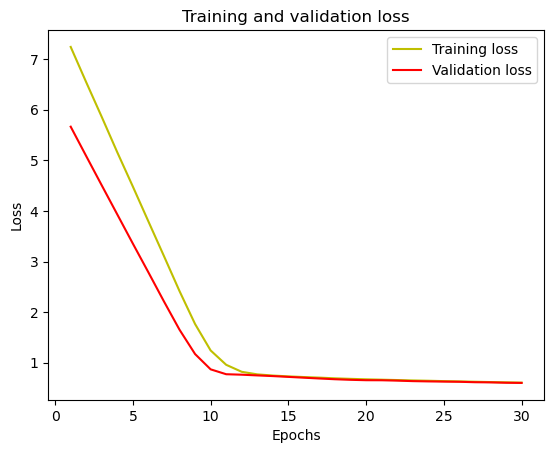

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend()
plt.show()

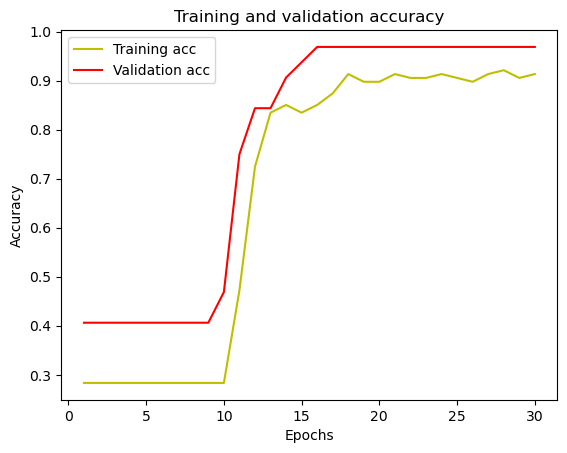

In [12]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()